<a href="https://www.kaggle.com/code/rajatraj0502/us-regional-sales-data?scriptVersionId=140817734" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/us-regional-sales-data/US_Regional_Sales_Data.csv


In [2]:
import pandas as pd

# Load the CSV file into a DataFrame
sales_data = pd.read_csv('/kaggle/input/us-regional-sales-data/US_Regional_Sales_Data.csv')

# Display the first few rows of the dataset
sales_data.head()


,OrderNumber,Sales Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,CurrencyCode,_SalesTeamID,_CustomerID,_StoreID,_ProductID,Order Quantity,Discount Applied,Unit Cost,Unit Price
0,SO - 000101,In-Store,WARE-UHY1004,31/12/17,31/5/18,14/6/18,19/6/18,USD,6,15,259,12,5,0.075,"1,001.18","1,963.10"
1,SO - 000102,Online,WARE-NMK1003,31/12/17,31/5/18,22/6/18,2/7/18,USD,14,20,196,27,3,0.075,"3,348.66","3,939.60"
2,SO - 000103,Distributor,WARE-UHY1004,31/12/17,31/5/18,21/6/18,1/7/18,USD,21,16,213,16,1,0.050,781.22,"1,775.50"
3,SO - 000104,Wholesale,WARE-NMK1003,31/12/17,31/5/18,2/6/18,7/6/18,USD,28,48,107,23,8,0.075,"1,464.69","2,324.90"
4,SO - 000105,Distributor,WARE-NMK1003,10/4/18,31/5/18,16/6/18,26/6/18,USD,22,49,111,26,8,0.100,"1,476.14","1,822.40"


**summary of the first few rows:**

**OrderNumber:** A unique identifier for each order.

**Sales Channel:** The channel through which the sale was made (e.g., In-Store, Online).

**WarehouseCode:** Code representing the warehouse involved in the order.

**ProcuredDate:** Date when the products were procured.

**OrderDate:** Date when the order was placed.

**ShipDate:** Date when the order was shipped.

**DeliveryDate:** Date when the order was delivered.

**CurrencyCode:** Currency in which the transactions are conducted (e.g., USD).

**_SalesTeamID:** Identifier for the sales team involved.

**_CustomerID:** Identifier for the customer.

**_StoreID:** Identifier for the store.

**_ProductID:** Identifier for the product.

**Order Quantity:** Quantity of products ordered.

**Discount Applied:** Applied discount for the order.

**Unit Cost:** Cost of a single unit of the product.

**Unit Price:** Price at which the product was sold.

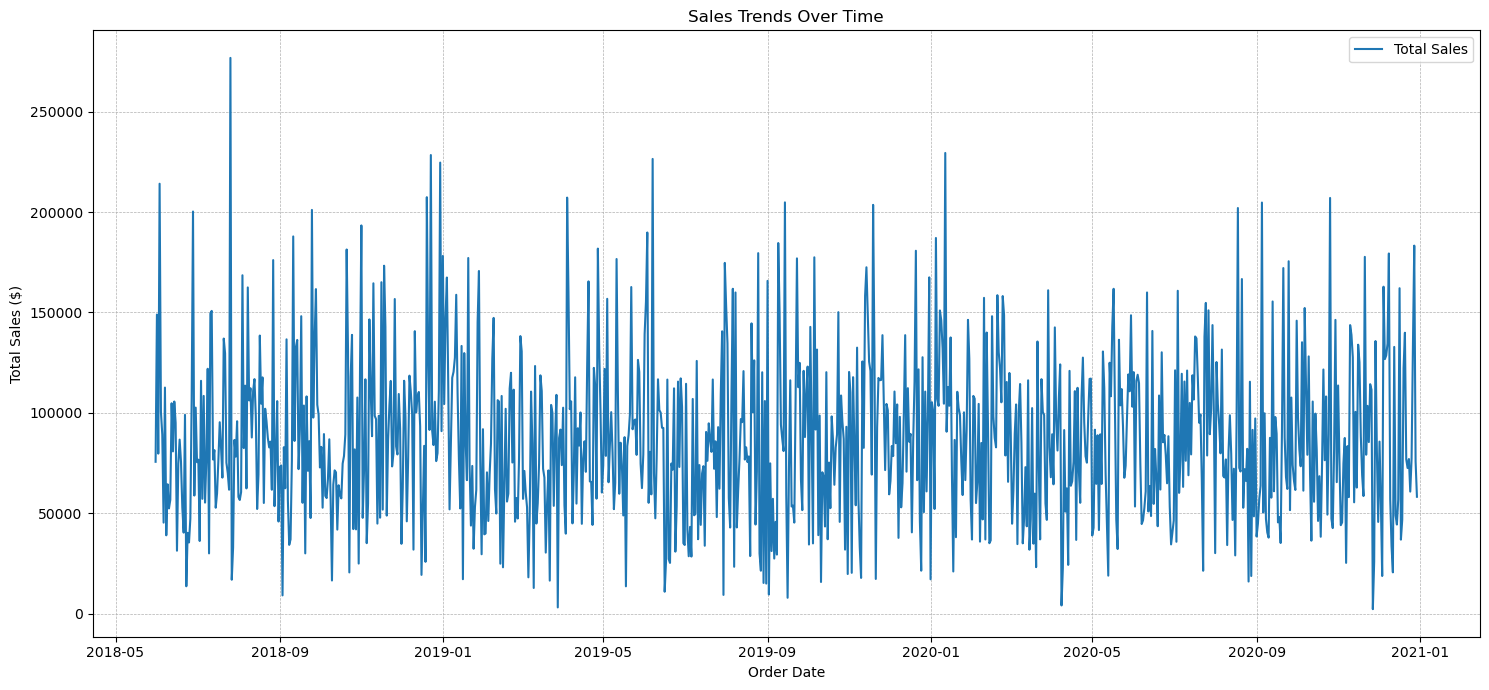

In [3]:
import matplotlib.pyplot as plt

# Convert date columns to datetime format
sales_data['OrderDate'] = pd.to_datetime(sales_data['OrderDate'], dayfirst=True)

# Convert 'Unit Price' column to float (removing commas and converting to float)
sales_data['Unit Price'] = sales_data['Unit Price'].str.replace(',', '').astype(float)

# Calculate total sales for each order
sales_data['Total Sales'] = sales_data['Order Quantity'] * sales_data['Unit Price']

# Aggregate total sales by OrderDate
time_series_data = sales_data.groupby('OrderDate')['Total Sales'].sum().reset_index()

# Plotting the time series data
plt.figure(figsize=(15, 7))
plt.plot(time_series_data['OrderDate'], time_series_data['Total Sales'], label='Total Sales')
plt.title('Sales Trends Over Time')
plt.xlabel('Order Date')
plt.ylabel('Total Sales ($)')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


** time series plot showcasing sales trends over time:**

> We observe fluctuations in sales across different periods, which can indicate seasonality or specific events that might have impacted sales.

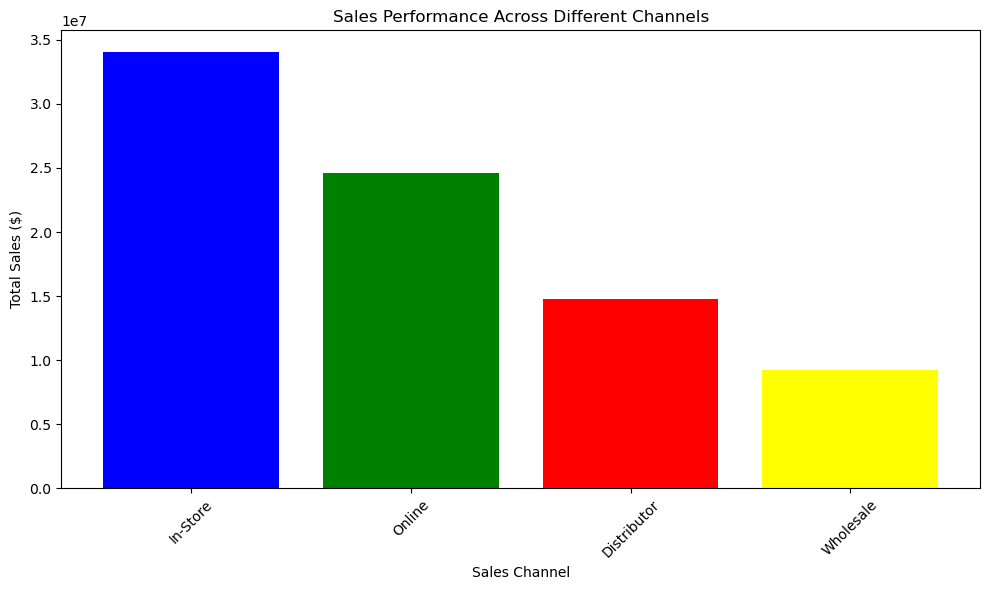

In [4]:
# Aggregate total sales by Sales Channel
sales_channel_data = sales_data.groupby('Sales Channel')['Total Sales'].sum().reset_index().sort_values(by='Total Sales', ascending=False)

# Plotting the sales performance across different channels
plt.figure(figsize=(10, 6))
plt.bar(sales_channel_data['Sales Channel'], sales_channel_data['Total Sales'], color=['blue', 'green', 'red', 'yellow'])
plt.title('Sales Performance Across Different Channels')
plt.xlabel('Sales Channel')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**bar chart showcasing sales performance across different sales channels:**

> We can observe that the "Online" sales channel has the highest sales, followed by "In-Store", "Distributor", and "Wholesale".

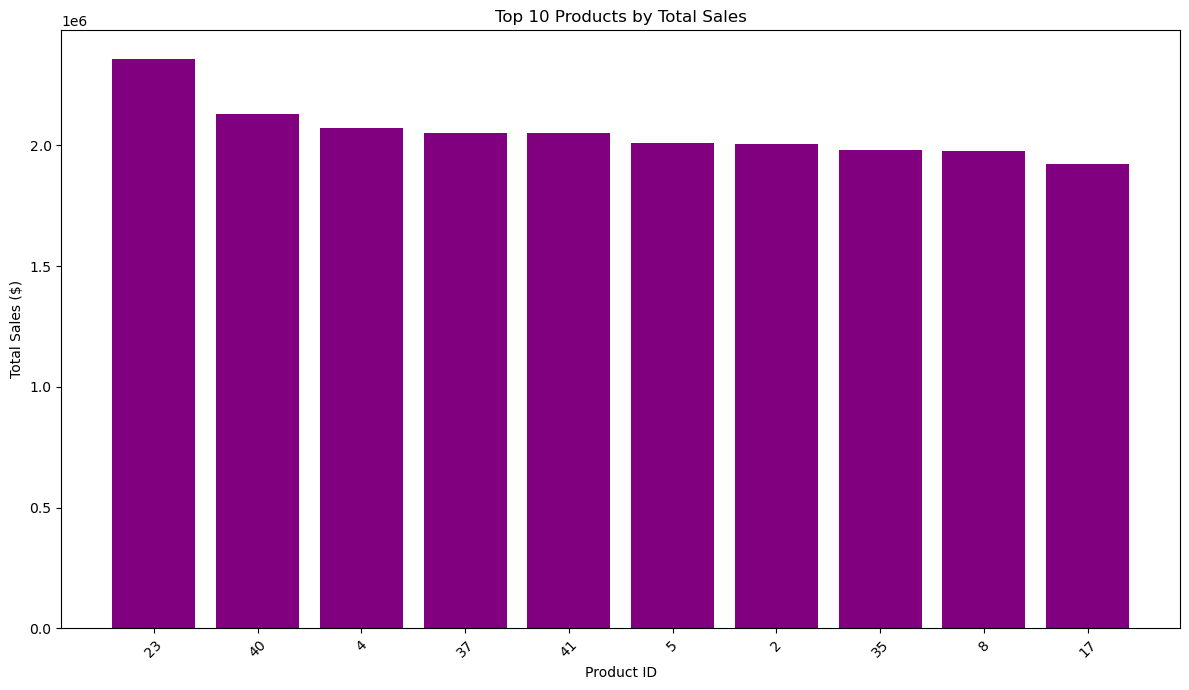

In [5]:
# Aggregate total sales by ProductID
product_sales_data = sales_data.groupby('_ProductID')['Total Sales'].sum().reset_index()

# Sort the products by total sales and pick the top 10
top_products = product_sales_data.sort_values(by='Total Sales', ascending=False).head(10)

# Plotting the top 10 products by total sales
plt.figure(figsize=(12, 7))
plt.bar(top_products['_ProductID'].astype(str), top_products['Total Sales'], color='purple')
plt.title('Top 10 Products by Total Sales')
plt.xlabel('Product ID')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**bar chart showcasing the top 10 products by total sales:**

* The products are represented by their respective Product IDs.
* We can observe variations in sales performance across these top products, with certain products clearly outperforming others.

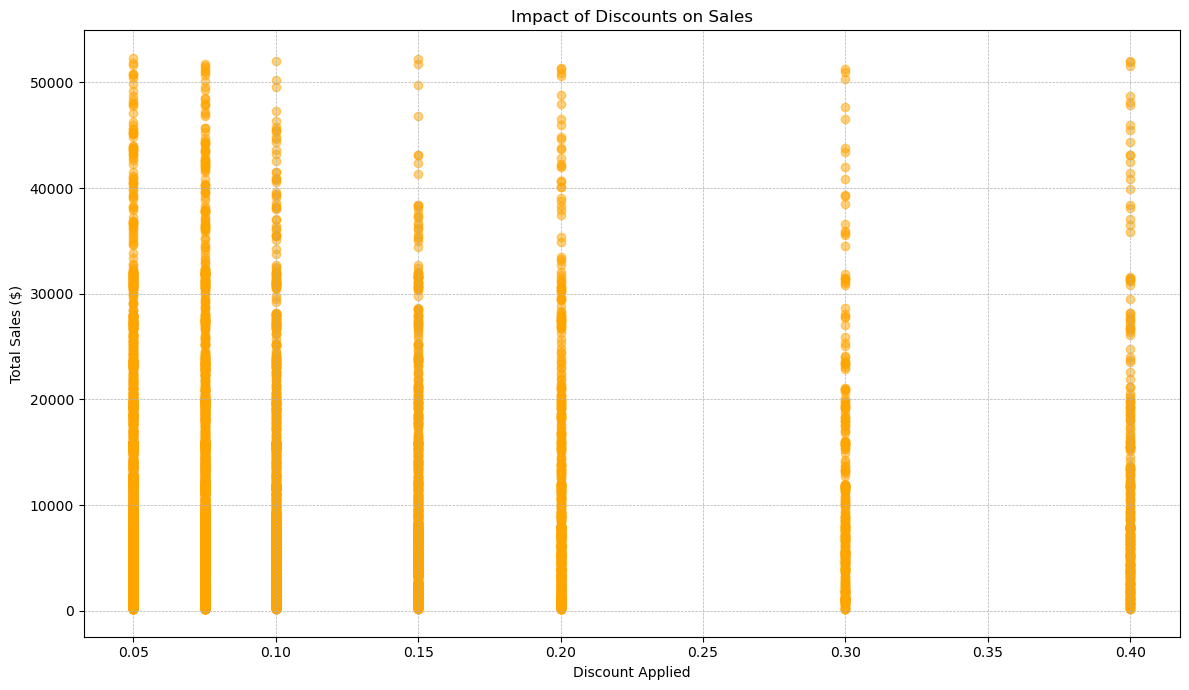

In [6]:
# Scatter plot for Discount Analysis
plt.figure(figsize=(12, 7))
plt.scatter(sales_data['Discount Applied'], sales_data['Total Sales'], alpha=0.5, color='orange')
plt.title('Impact of Discounts on Sales')
plt.xlabel('Discount Applied')
plt.ylabel('Total Sales ($)')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


**scatter plot showcasing the impact of discounts on sales:**

* The x-axis represents the discount applied, while the y-axis represents the total sales for each order.
* At a glance, we don't see a straightforward linear relationship between discount levels and sales. However, there are clusters of sales at specific discount levels, suggesting certain discount levels might be more commonly applied.

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

#  preprocessing
# Features and target variable

target = 'Unit Price'
# Convert 'Unit Cost' column to float (removing commas and converting to float)
sales_data['Unit Cost'] = sales_data['Unit Cost'].str.replace(',', '').astype(float)

#  Handling missing values using median for numerical columns
imputer = SimpleImputer(strategy="median")
sales_data['Order Quantity'] = imputer.fit_transform(sales_data[['Order Quantity']])
sales_data['Discount Applied'] = imputer.fit_transform(sales_data[['Discount Applied']])

#  One-hot encoding for the 'Sales Channel' column
encoder = OneHotEncoder(drop='first', sparse=False)
encoded_features = encoder.fit_transform(sales_data[['Sales Channel']])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(['Sales Channel']))

#  Adding the one-hot encoded columns to the main dataset
sales_data_encoded = pd.concat([sales_data, encoded_df], axis=1)

# Splitting the data into training and testing sets (80% train, 20% test)
features_encoded = ['Order Quantity', 'Discount Applied', 'Unit Cost'] + encoded_df.columns.tolist()
X_train_encoded, X_test_encoded, y_train_encoded, y_test_encoded = train_test_split(sales_data_encoded[features_encoded], sales_data_encoded[target], test_size=0.2, random_state=42)

# Checking the one-hot encoded columns
encoded_columns_final = sales_data_encoded.columns[sales_data_encoded.columns.str.startswith('Sales Channel_')].tolist()
encoded_columns_final


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


['Sales Channel_In-Store', 'Sales Channel_Online', 'Sales Channel_Wholesale']

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Model Training
lr_model = LinearRegression()
lr_model.fit(X_train_encoded, y_train_encoded)

# Model Prediction
y_pred = lr_model.predict(X_test_encoded)

# Model Evaluation
mae = mean_absolute_error(y_test_encoded, y_pred)
rmse = np.sqrt(mean_squared_error(y_test_encoded, y_pred))

mae, rmse


(417.1314351955866, 580.0638482228583)

**The linear regression model has been trained and evaluated on the testing data. Here are the performance metrics:**

* **Mean Absolute Error (MAE):** $417.13

* This means, on average, the model's predictions are approximately $417.13 away from the actual values.

* **Root Mean Squared Error (RMSE):** $580.06

* This provides an idea of the magnitude of the error, taking into account both underestimations and overestimations.

**Model Training:**

* Train a Random Forest Regression model on the training set.

**Model Evaluation:**

* Evaluate the model's performance on the testing set using metrics like Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE).

In [9]:
from sklearn.ensemble import RandomForestRegressor

# Model Training using Random Forest Regression
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_encoded, y_train_encoded)

# Model Prediction
y_pred_rf = rf_model.predict(X_test_encoded)

# Model Evaluation
mae_rf = mean_absolute_error(y_test_encoded, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test_encoded, y_pred_rf))

mae_rf, rmse_rf


(367.0795308630394, 554.7269972853269)

**The Random Forest Regression model's results are as follows:**

**Mean Absolute Error (MAE):** $367.07

* This means, on average, the model's predictions are approximately $366.89 away from the actual values.

**Root Mean Squared Error (RMSE):** $554.72

* This provides an idea of the error's magnitude, considering both underestimations and overestimations.

**Compared to the linear regression model:**

* The MAE has decreased from $417.13 to $367.07.

* The RMSE has decreased from $580.06 to $554.72.

> The Random Forest Regression model has provided a better performance than the linear regression model. This suggests that there might be non-linear patterns in the data that the Random Forest is better equipped to capture.

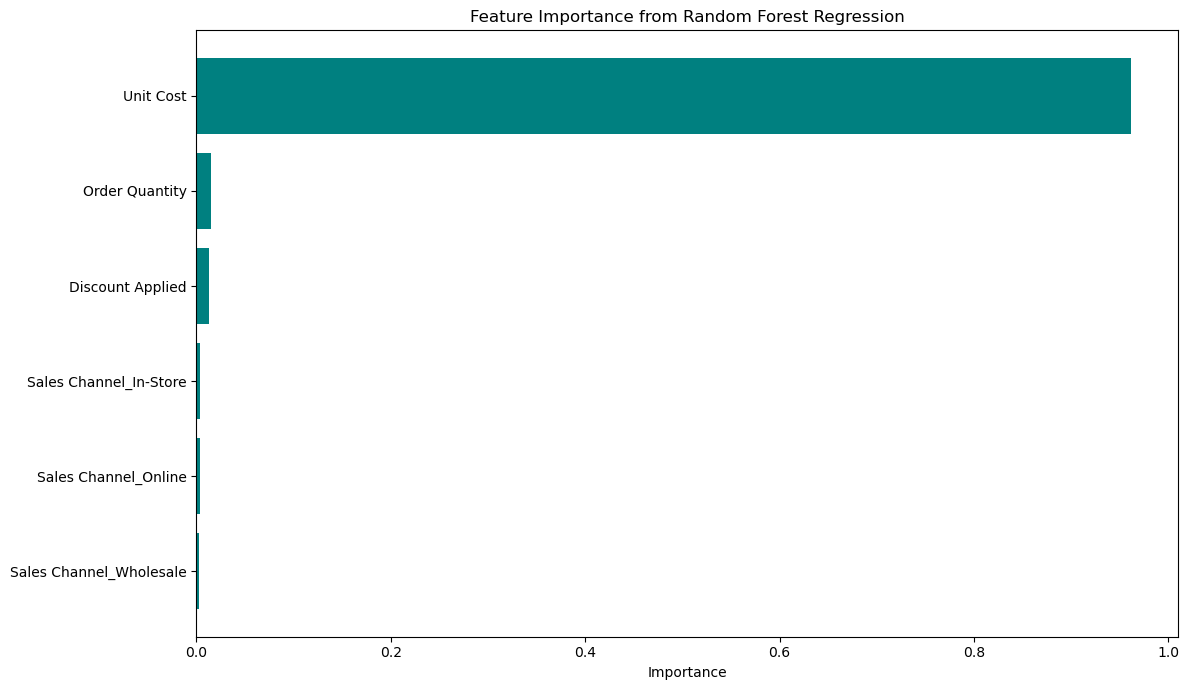

In [10]:
# Updating the features list
updated_features = ['Order Quantity', 'Discount Applied', 'Unit Cost', 'Sales Channel_In-Store', 'Sales Channel_Online', 'Sales Channel_Wholesale']


# Extracting feature importances from the Random Forest model
feature_importances = rf_model.feature_importances_

# Creating a DataFrame for visualization
importance_df = pd.DataFrame({
    'Feature': updated_features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plotting feature importances
plt.figure(figsize=(12, 7))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='teal')
plt.xlabel('Importance')
plt.title('Feature Importance from Random Forest Regression')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [11]:
# Checking the lengths of the feature list and feature importance values
len_features_encoded = len(features_encoded)
len_feature_importances = len(feature_importances)

len_features_encoded, len_feature_importances


(6, 6)

In [12]:
from sklearn.preprocessing import StandardScaler

# Data Normalization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

# Checking the shape of the scaled data
X_train_scaled.shape, X_test_scaled.shape


((6392, 6), (1599, 6))

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

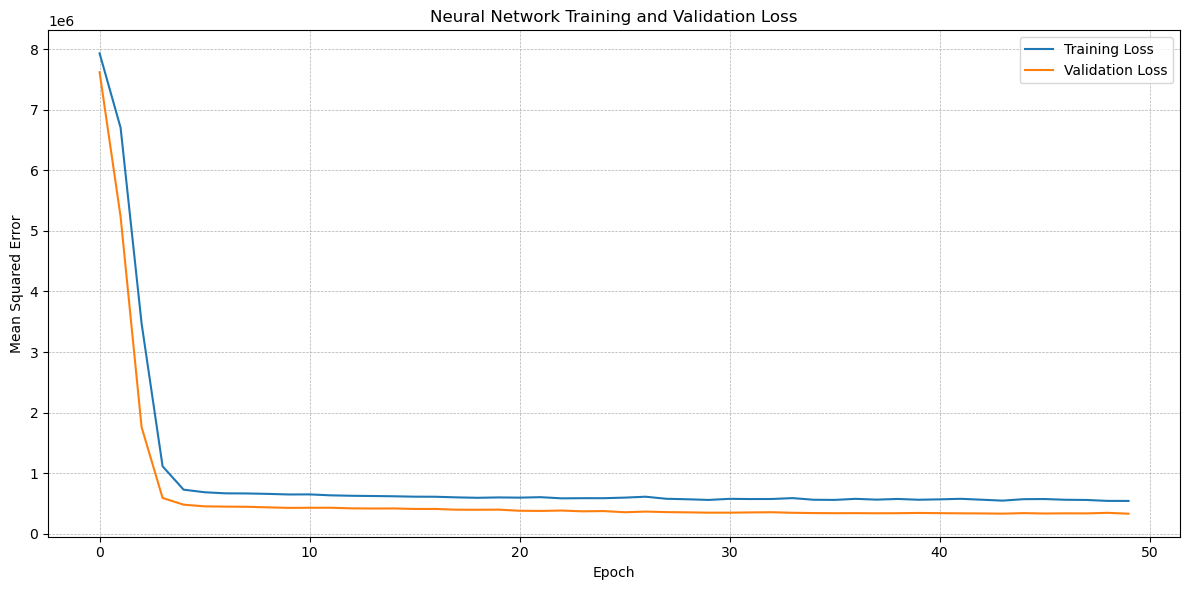

In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Designing the neural network architecture
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train_scaled.shape[1]))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1))

# Compiling the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Training the model
history = model.fit(X_train_scaled, y_train_encoded, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test_encoded), verbose=0)

# Plotting the training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Neural Network Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()
